향후 약 3주 간(23.4.5~ 4.25)의 제품 판매량 예측하는 머신러닝 모델 만들기

데이터셋 
1. train.csv

2. sales.csv 
3. brand_keyword_cnt.csv

4. product_info.csv

5. sample_submission.csv 


# 1. train.csv

- 제품: 제품 코드
- 대분류 : 제품의 대분류 코드
- 중분류 : 제품의 중분류 코드
- 소분류 : 제품의 소분류 코드
- 브랜드 : 제품의 브랜드 코드
- 2022-01-01 ~ 2023-04-04 : 실제 일별 판매량

# 2. sales.csv

- ID : 실제 판매되고 있는 고유 ID
- 제품: 제품 코드
- 대분류 : 제품의 대분류 코드
- 중분류 : 제품의 중분류 코드
- 소분류 : 제품의 소분류 코드
- 브랜드 : 제품의 브랜드 코드
- 2022-01-01 ~ 2023-04-04 : 실제 총 판매금액

# 3.brand_keyword_cnt.csv

- 브랜드 : 브랜드 코드
- 2022-01-01 ~ 2023-04-04 : 브랜드의 연관키워드 언급량을 정규화한 일별 데이
- 메타(Meta) 정보터

# 4. product_info.csv

- 제품 : 제품 코드
- 제품특성 : 제품 특성 데이터(Text)
- train.csv에 존재하는 모든 제품 코드가 포함되어 있지 않음.
- 또는 product_info.csv에 존재하는 제품 코드가 train.csv에 존재하지 않을 수 있음

# 5. sample_submission.csv

- ID : 실제 판매되고 있는 고유 ID

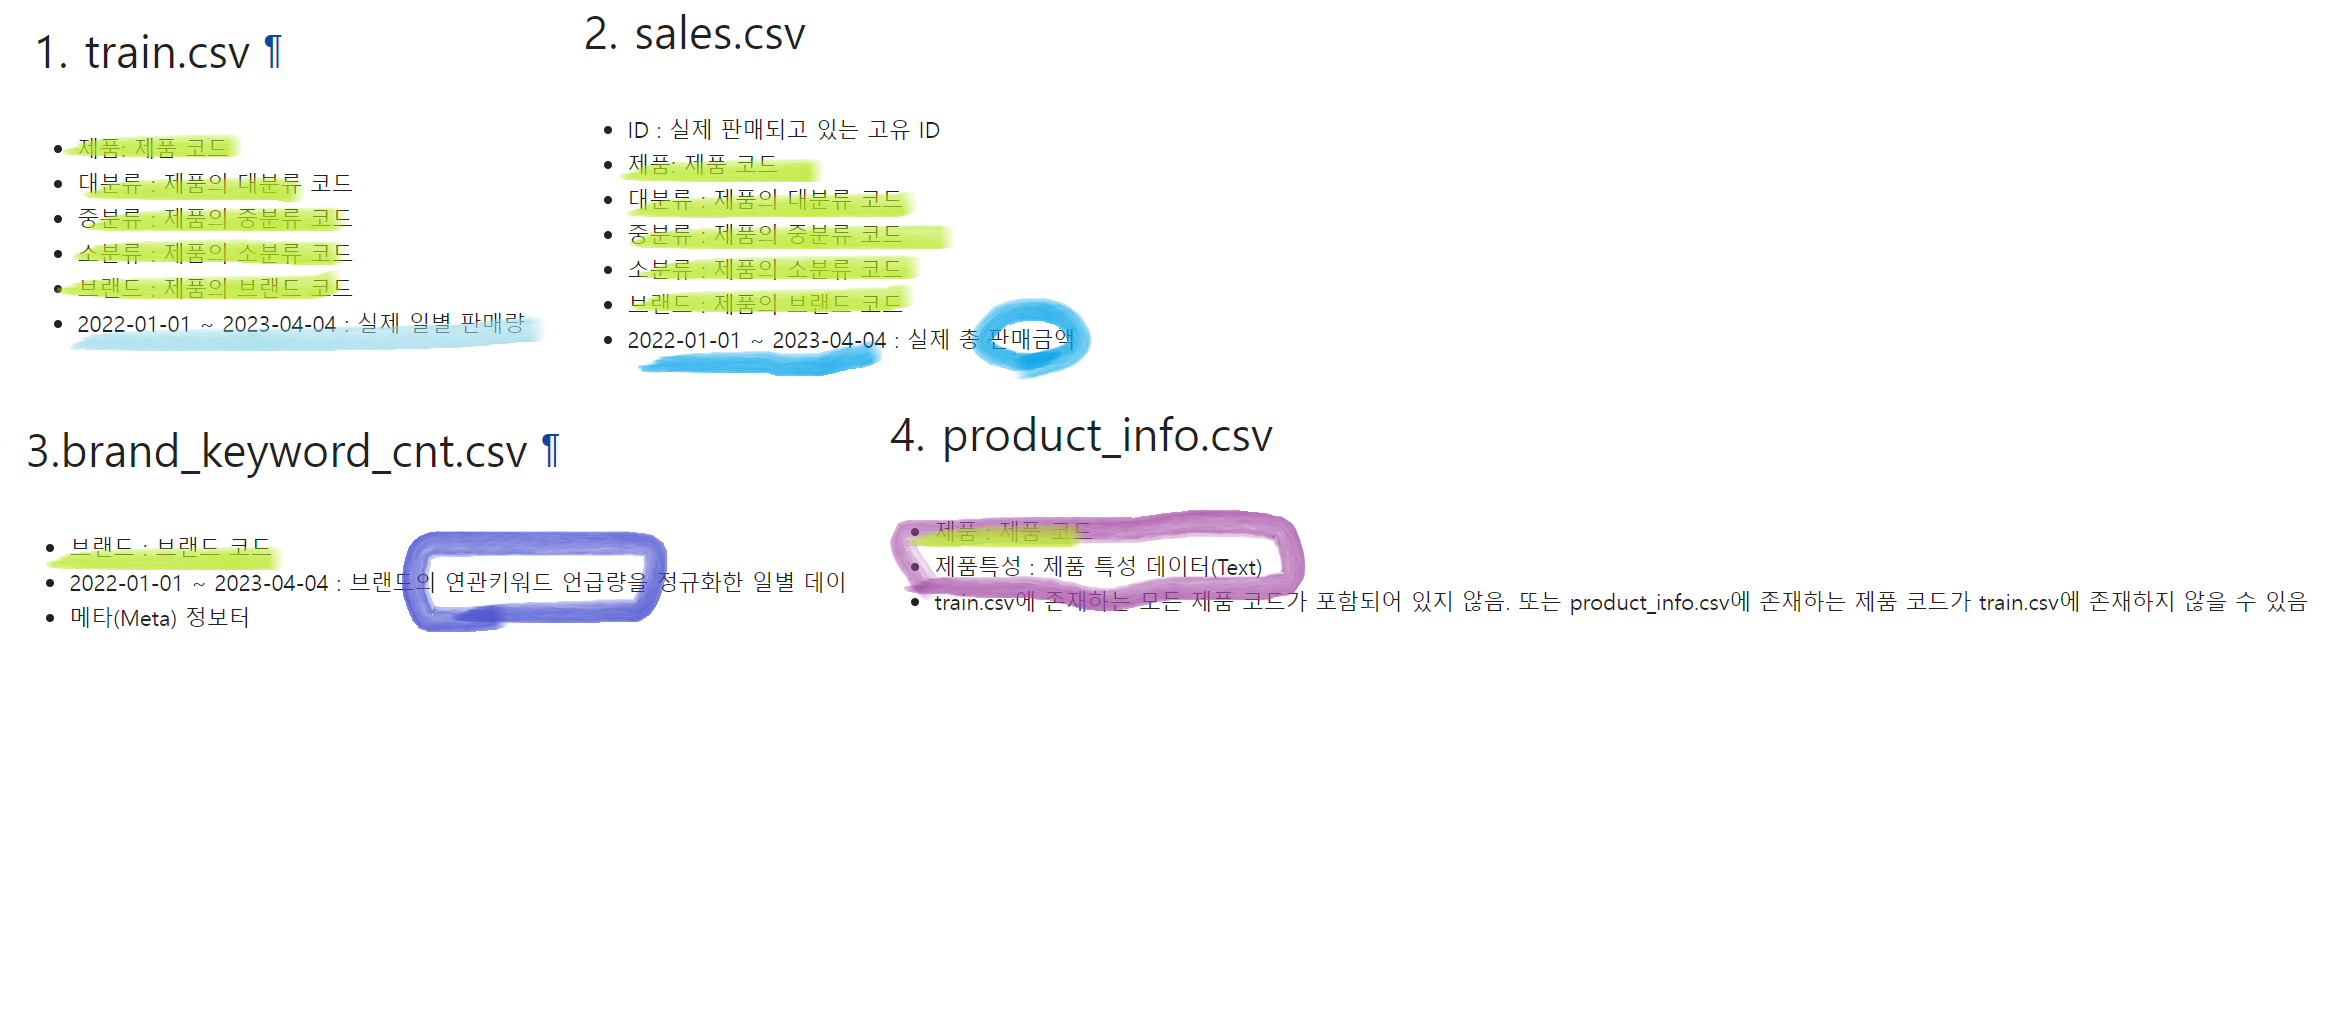

## 0. 필요한 라이브러리 , 모듈 불러오기 

In [71]:
import pandas as pd
import numpy as np

## 1. 데이터 불러와서 간략 정보만 보기 

In [72]:
df = pd.read_csv(r'D:\2024\공부\AI아이펠\공부\240222_데이터톤\데이터\train.csv') 
#train data 
sales = pd.read_csv(r'D:\2024\공부\AI아이펠\공부\240222_데이터톤\데이터\sales.csv')
keywords =pd.read_csv(r'D:\2024\공부\AI아이펠\공부\240222_데이터톤\데이터\brand_keyword_cnt.csv')
info = pd.read_csv(r'D:\2024\공부\AI아이펠\공부\240222_데이터톤\데이터\product_info.csv')

In [73]:
df.head(1)

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
sales.head(1)

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
keywords.head(1)

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001,0.84131,0.91383,1.45053,2.42239,1.87119,1.58108,1.23295,1.17493,1.14592,...,0.31911,0.39164,0.37713,0.49318,0.07252,0.2901,0.31911,0.23208,0.33362,0.44966


In [76]:
info.head(10)

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,"제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:400mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:1포 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:300mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품 14in1 700mg x 56정"
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분 :1개 510mg x 60정
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):판토텐산 1일 총 섭취량:4정 제품용량:28일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 700mg x 112정
5,B002-02769-00002,"제품유형:일반식품 섭취대상:성인남녀 제품타입:액상 제품용량:7일분 섭취횟수:하루 한 번 1일 총 섭취량:1개 섭취방법:바로 음용 :1개, 주요 기능성(식약처인증):해당 없음 영양소 원료명(식약처고시):해당 없음 종류:어류 분자량:500Da 제품타입:정 제품용량:1개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:씹어서 :1개, 제품유형:일반식품 섭취대상:성인남녀 제품타입:분말 제품용량:1개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:물과 함께 25ml x 7병"
6,B002-03432-00001,섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:2포 제품용량:15일분 주요 기능성(식약처인증):체지방 감소 카테킨:300mg :1개 3g x 30포
7,B002-01075-00001,"제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):정, 생균1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주요 기능성(식약처인증):1억 CFU, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)카테킨:정, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)카테킨:정, 생균1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주요 기능성(식약처인증):1억 CFU, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)제품유형:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 식품품질인증제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:GMP우수건강기능식품제조기준, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입:분말 섭취방법:물에 섞어서 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1포 제품용량:50일분 :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:캡슐, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정 900mg x 30정"
8,B002-02925-00001,제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):해당 없음 푸닉산+후코잔틴:177mg :1개 600mg x 30캡슐
9,B002-00771-00001,"HCA:800mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 1일 총 섭취량:1포 제품용량:1개월분 제품타입:분말 섭취횟수:하루 한 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, HCA:750mg 영양소 원료명(식약처고시):해당 없음 1일 총 섭취량:1포 제품용량:1개월분 제품타입:분말 섭취횟수:하루 한 번 섭취방법:바로 음용 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 3g x 30포"


In [77]:
pd.set_option('display.max_colwidth', None) 

In [78]:
display(info.head(1))

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포


### 우리가 처리해야할 자연어는 info에만 들어가 있음. 해당 데이터에서 불용어 제외하고 만들어보기 

## 2. 자연어처리 (info data)

In [79]:
#info data에 결측치가 있나요?
len(info) - info.count()

제품      0
제품특성    0
dtype: int64

In [80]:
info.isnull().sum()

제품      0
제품특성    0
dtype: int64

In [81]:
#중복 데이터가 있나요? 
info[info.duplicated()]

,제품,제품특성


In [82]:
#자연어 처리 필요 라이브러리 생성
import pandas as pd
from konlpy.tag import Okt

In [83]:
tokenizer = Okt()
text_series = info['제품특성'].astype(str)  # Series를 문자열로 변환
tokens = text_series.apply(lambda x: tokenizer.morphs(x))  # 각 문장에 대해 토큰화 수행

print(tokens)

0                                                                                                                                                                                      [제품, 유형, :, 일반, 식품, 콜라겐, 펩타이드, :, 1000, mg, 종류, :, 어류, 분자량, :, 300, Da, 섭취, 대상, :, 성인, 남녀, 제품, 타입, :, 분말, 제품, 용량, :, 3, 개월, 분, 섭취, 횟수, :, 하루, 한, 번, 1일, 총, 섭취, 량, :, 1, 포, 섭취, 방법, :, 바로, 음용, :, 1, 개, 2, g, x, 30, 포]
1                                                                                                                                                                                                                                                                                                                                                                                         [700, mg, x, 28, 정]
2        [제품, 타입, :, 정, 섭취, 방법, :, 물, 과, 함께, 섭취, 대상, :, 성인, 남녀, 섭취, 횟수, :, 하루, 두, 번, 1일, 총, 섭취, 량, :, 4, 정, 제품, 용량, :, 14일, 분, 주요, 기능, 성, (, 식약처, 인증, ):, 체지방, 감소, 영양소, 원료, 명, (, 식약처, 고시, ):, 비타민, A, 영양소, 

In [84]:
# 토큰화- 명사만 추출 
nouns = text_series.apply(lambda x: tokenizer.nouns(x))  # 각 문장에 대해 토큰화 수행
print(nouns)

0                                                                                                                                                                                                                                                                                                                         [제품, 유형, 일반, 식품, 콜라겐, 펩타이드, 종류, 어류, 분자량, 섭취, 대상, 성인, 남녀, 제품, 타입, 분말, 제품, 용량, 개월, 섭취, 횟수, 하루, 번, 총, 섭취, 량, 포, 섭취, 방법, 바로, 음용, 개, 포]
1                                                                                                                                                                                                                                                                                                                                                                                                                                                        [정]
2        [제품, 타입, 정, 섭취, 방법, 물, 섭취, 대상, 성인, 남녀, 섭취, 횟수, 하루, 두, 번, 총, 섭취, 량, 정, 제품, 용량, 주요, 기능, 식약처, 인증, 체지방, 감

In [85]:
# 품사 태깅 - ,품사가 어떤 것인지? 
pos = text_series.apply(lambda x: tokenizer.pos(x))  # 각 문장에 대해 토큰화 수행
print(pos)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [(제품, Noun), (유형, Noun), (:, Punctuation), (일반, Noun), (식품, Noun), (콜라겐, Noun), (펩타이드, Noun), (:, Punctuation), (1000, Number), (mg, Alpha), (종류, Noun), (:, Punctuation), (어류, Noun), (분자량, Noun), (:, Punctuation), (300, Number), (Da, Alpha), (섭취, Noun), (대상, Noun), (:, Punctuation), (성인, Noun), (남녀, Noun), (제품, N

## CounterVectorizer로 많이 나오는 애들 보기 

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

# tokens 리스트 안에 있는 각 문장을 공백을 이용하여 문자열로 결합
token_strings = [' '.join(token_list) for token_list in tokens]

# 데이터 학습
vect.fit(token_strings)

# CounterVectorizer로 많이 나오는 단어를 보기
print(vect.get_feature_names_out())

['00' '000' '000시간' ... '흡착' '히알루론산' '히터']


In [ ]:
vect.vocabulary_ #딕셔너리 형식으로 (키-값 쌍으로 있다.) 

In [88]:
#콜라겐, 펩타이드, 체지방, 비타민, 나이아신, 판토텐산, 아연, '셀레늄', '셀렌', '카테킨', '생균', '비오틴', '후코','식이섬유', 

## 불용어 만들기 

제품': 3226,
 '유형': 2983,
 '일반': 3061,
 '식품': 2651, 
 숫자 제외할거, 영어도 제외
 

In [89]:
#1. 딕셔너리 형식인데, 키값만 가져오기
사전 = vect.vocabulary_
사전

{'제품': 3226,
 '유형': 2983,
 '일반': 3061,
 '식품': 2651,
 '콜라겐': 3503,
 '펩타이드': 3728,
 '1000': 29,
 'mg': 1201,
 '종류': 3244,
 '어류': 2771,
 '분자량': 2258,
 '300': 490,
 'da': 1100,
 '섭취': 2412,
 '대상': 1719,
 '성인': 2418,
 '남녀': 1612,
 '타입': 3568,
 '분말': 2251,
 '용량': 2911,
 '개월': 1388,
 '횟수': 3968,
 '하루': 3861,
 '1일': 314,
 '방법': 2132,
 '바로': 2097,
 '음용': 3000,
 '30': 489,
 '700': 872,
 '28': 458,
 '함께': 3873,
 '14일': 203,
 '주요': 3262,
 '기능': 1556,
 '식약처': 2645,
 '인증': 3046,
 '체지방': 3363,
 '감소': 1374,
 '영양소': 2852,
 '원료': 2931,
 '고시': 1448,
 '비타민': 2309,
 '12': 108,
 '나이아신': 1599,
 '판토텐산': 3677,
 '아연': 2696,
 '셀레늄': 2446,
 '셀렌': 2447,
 '카테킨': 3445,
 '400': 616,
 '건강': 1401,
 '14': 177,
 'in': 1158,
 '56': 759,
 '510': 727,
 '60': 793,
 'hca': 1141,
 '900': 977,
 '28일': 468,
 '112': 85,
 '7일': 924,
 '해당': 3885,
 '없음': 2786,
 '500': 708,
 '씹어서': 2679,
 '25': 415,
 'ml': 1209,
 '15일': 228,
 '생균': 2380,
 '상주': 2366,
 '1억': 313,
 'cfu': 1089,
 '품질': 3778,
 'gmp': 1133,
 '우수': 2920,
 '기준': 1572,
 '섞어서

In [90]:
keys = 사전.keys()

keys

dict_keys(['제품', '유형', '일반', '식품', '콜라겐', '펩타이드', '1000', 'mg', '종류', '어류', '분자량', '300', 'da', '섭취', '대상', '성인', '남녀', '타입', '분말', '용량', '개월', '횟수', '하루', '1일', '방법', '바로', '음용', '30', '700', '28', '함께', '14일', '주요', '기능', '식약처', '인증', '체지방', '감소', '영양소', '원료', '고시', '비타민', '12', '나이아신', '판토텐산', '아연', '셀레늄', '셀렌', '카테킨', '400', '건강', '14', 'in', '56', '510', '60', 'hca', '900', '28일', '112', '7일', '해당', '없음', '500', '씹어서', '25', 'ml', '15일', '생균', '상주', '1억', 'cfu', '품질', 'gmp', '우수', '기준', '섞어서', '50일', '캡슐', '닉산', '후코', '잔틴', '177', '600', '800', '750', '구미', '젤리', '20', '777', '비오틴', '피부', '단백질', '285', '42일', '84', '10', '620', '850', '식이섬유', '6일', '12000', '개입', '760', '56일', '2500', '90', '성분', '분리', 'isp', '초코', '엽산', '칼슘', '마그네슘', '식물성', '개인', '다름', '동물성', '우유', '구리', '요오드', '망간', '키토산', '10일', '10억', '3500', '2200', '여성', '달톤', '저분자', '피쉬', '먹는', '어린', '엘라스', '히알루론산', '3000', '3300', '86', '36', '70일', '7141', '45', '35일', '512', '12일', '아르기닌', '용기', '페트병', '카페인', '유무', '아메리카

In [91]:
type(keys)

dict_keys

In [92]:
# 딕셔너리의 키들 중 숫자로만 이루어진 값들을 제외한 키들을 새로운 리스트에 저장
non_numeric_keys = [key for key in keys if not key.isdigit()]

print(non_numeric_keys)

['제품', '유형', '일반', '식품', '콜라겐', '펩타이드', 'mg', '종류', '어류', '분자량', 'da', '섭취', '대상', '성인', '남녀', '타입', '분말', '용량', '개월', '횟수', '하루', '1일', '방법', '바로', '음용', '함께', '14일', '주요', '기능', '식약처', '인증', '체지방', '감소', '영양소', '원료', '고시', '비타민', '나이아신', '판토텐산', '아연', '셀레늄', '셀렌', '카테킨', '건강', 'in', 'hca', '28일', '7일', '해당', '없음', '씹어서', 'ml', '15일', '생균', '상주', '1억', 'cfu', '품질', 'gmp', '우수', '기준', '섞어서', '50일', '캡슐', '닉산', '후코', '잔틴', '구미', '젤리', '비오틴', '피부', '단백질', '42일', '식이섬유', '6일', '개입', '56일', '성분', '분리', 'isp', '초코', '엽산', '칼슘', '마그네슘', '식물성', '개인', '다름', '동물성', '우유', '구리', '요오드', '망간', '키토산', '10일', '10억', '여성', '달톤', '저분자', '피쉬', '먹는', '어린', '엘라스', '히알루론산', '70일', '35일', '12일', '아르기닌', '용기', '페트병', '카페인', '유무', '아메리카노', '수량', '구분', '전용', '환기', '일리', '홍삼', '농축액', '함량', '고형', '유아', '청소년', '면역', '파우치', '중량', '포장', '45일', '100일', '항산화', '스푼', '20일', '콜레스테롤', '농축', '유청', 'wpc', '개당', '열량', 'kcal', 'bcaa', '세트', '메뉴', '곤약', '잡곡', '볶음밥', '형태', '보관', '냉동', '무게', '츄어블', '스틱', '앰플', '다이어트', '5일', '비

In [93]:
# 숫자, n억, n회,  n일, n분, n은 참고로 숫자

In [94]:
import re

# 정규 표현식 패턴 정의
pattern = re.compile(r'\b\d+[억회일분만시간초년]\b')

# 딕셔너리의 키들 중 숫자와 관련된 문자열을 제외한 키들을 새로운 리스트에 저장
non_numeric_keys = [key for key in keys if not (pattern.match(key) or key.isdigit())]

print(non_numeric_keys)

['제품', '유형', '일반', '식품', '콜라겐', '펩타이드', 'mg', '종류', '어류', '분자량', 'da', '섭취', '대상', '성인', '남녀', '타입', '분말', '용량', '개월', '횟수', '하루', '방법', '바로', '음용', '함께', '주요', '기능', '식약처', '인증', '체지방', '감소', '영양소', '원료', '고시', '비타민', '나이아신', '판토텐산', '아연', '셀레늄', '셀렌', '카테킨', '건강', 'in', 'hca', '해당', '없음', '씹어서', 'ml', '생균', '상주', 'cfu', '품질', 'gmp', '우수', '기준', '섞어서', '캡슐', '닉산', '후코', '잔틴', '구미', '젤리', '비오틴', '피부', '단백질', '식이섬유', '개입', '성분', '분리', 'isp', '초코', '엽산', '칼슘', '마그네슘', '식물성', '개인', '다름', '동물성', '우유', '구리', '요오드', '망간', '키토산', '여성', '달톤', '저분자', '피쉬', '먹는', '어린', '엘라스', '히알루론산', '아르기닌', '용기', '페트병', '카페인', '유무', '아메리카노', '수량', '구분', '전용', '환기', '일리', '홍삼', '농축액', '함량', '고형', '유아', '청소년', '면역', '파우치', '중량', '포장', '항산화', '스푼', '콜레스테롤', '농축', '유청', 'wpc', '개당', '열량', 'kcal', 'bcaa', '세트', '메뉴', '곤약', '잡곡', '볶음밥', '형태', '보관', '냉동', '무게', '츄어블', '스틱', '앰플', '다이어트', '비포밀', '애프터', '량주', 'haccp', '사이즈', '크롬', '굿밤', '가르시니아', '유산균', '초유', '포스트', '바이오', '영양', '보충', '공액', '리놀레산', '몰리브덴', '남성', '플러스', 

### 한국어는 -> 단어인 것만 OKAY (단어가 되는 것만 OKAY)
### 영어는 대부분 의미가 없으니 지우기 


In [95]:
len(non_numeric_keys)

2962

In [96]:
import re

# 정규 표현식 패턴 정의
pattern = re.compile(r'\b(\d+[억회일분만시간초년]|1[억회일분만시간초년]|만)\b')

# 딕셔너리의 키들 중 숫자와 관련된 문자열을 제외한 키들을 새로운 리스트에 저장
non_numeric_keys = [key for key in keys if not (pattern.match(key) or key.isdigit())]


result = [non_numeric_keys for non_numeric_keys in non_numeric_keys if non_numeric_keys not in non_numeric_english_keys]

result

['제품',
 '유형',
 '일반',
 '식품',
 '콜라겐',
 '펩타이드',
 'mg',
 '종류',
 '어류',
 '분자량',
 'da',
 '섭취',
 '대상',
 '성인',
 '남녀',
 '타입',
 '분말',
 '용량',
 '개월',
 '횟수',
 '하루',
 '방법',
 '바로',
 '음용',
 '함께',
 '주요',
 '기능',
 '식약처',
 '인증',
 '체지방',
 '감소',
 '영양소',
 '원료',
 '고시',
 '비타민',
 '나이아신',
 '판토텐산',
 '아연',
 '셀레늄',
 '셀렌',
 '카테킨',
 '건강',
 'in',
 'hca',
 '해당',
 '없음',
 '씹어서',
 'ml',
 '생균',
 '상주',
 'cfu',
 '품질',
 'gmp',
 '우수',
 '기준',
 '섞어서',
 '캡슐',
 '닉산',
 '후코',
 '잔틴',
 '구미',
 '젤리',
 '비오틴',
 '피부',
 '단백질',
 '식이섬유',
 '개입',
 '성분',
 '분리',
 'isp',
 '초코',
 '엽산',
 '칼슘',
 '마그네슘',
 '식물성',
 '개인',
 '다름',
 '동물성',
 '우유',
 '구리',
 '요오드',
 '망간',
 '키토산',
 '여성',
 '달톤',
 '저분자',
 '피쉬',
 '먹는',
 '어린',
 '엘라스',
 '히알루론산',
 '아르기닌',
 '용기',
 '페트병',
 '카페인',
 '유무',
 '아메리카노',
 '수량',
 '구분',
 '전용',
 '환기',
 '일리',
 '홍삼',
 '농축액',
 '함량',
 '고형',
 '유아',
 '청소년',
 '면역',
 '파우치',
 '중량',
 '포장',
 '항산화',
 '스푼',
 '콜레스테롤',
 '농축',
 '유청',
 'wpc',
 '개당',
 '열량',
 'kcal',
 'bcaa',
 '세트',
 '메뉴',
 '곤약',
 '잡곡',
 '볶음밥',
 '형태',
 '보관',
 '냉동',
 '무게',
 '츄어블',
 '스틱',
 '앰플',
 '다이어트

In [97]:
len(result)

2939

### 
['제품',
 '유형',
 '일반',
 '식타이드',
 'mg',
 '어류',
 '분자량',
 'da',
 '섭취',
 '대상',
 '성인',
 '남녀',
 '타입',
 '분말',
 '용량',
 '개월',
 '횟수',
 '하루',
 '방법',
 '바로',
 '음용',
 '함

 께',
 '주요',
 '기능',
 '식약처'

In [98]:
type(result)

list

result에서 '제품',
 '유형',
 '일반',
 '식품',
 'mg',
 '종류',
 '분자량',
 'da',
 '섭취',
 '대상',
 '성인',
 '남녀',
 '타입',
 '분말',
 '용량',
 '개월',
 '횟수',
 '하루',
 '방법',
 '바로',
 '음용',
 '함께',
 '주요',
 '기능',
 '식약처' 
와 같은 단어들을 제거.result는 list, 

2914

In [102]:
type(filtered_result)

list

In [132]:
# 결과 리스트에서 원하지 않는 단어들을 제거하는 방법
unwanted_words = ['제품', '유형', '일반', '식품', 'mg', '종류', '분자량', 'da', '섭취', '대상', '성인', '남녀', '타입', '분말', '용량', '개월', 
                  '횟수', '하루', '방법', '바로', '음용', '함께', '주요', '기능', '식약처','영양성분','msm','kal','ml',
                 'in', 'kg','db','시간','이상','이하','불가','모든','영양소']

# 결과 리스트에서 원하지 않는 단어들을 제거하여 새로운 리스트 생성
filtered_result = [word for word in result if word not in unwanted_words]

print(filtered_result)

['콜라겐', '펩타이드', '어류', '인증', '체지방', '감소', '원료', '고시', '비타민', '나이아신', '판토텐산', '아연', '셀레늄', '셀렌', '카테킨', '건강', 'hca', '해당', '없음', '씹어서', '생균', '상주', 'cfu', '품질', 'gmp', '우수', '기준', '섞어서', '캡슐', '닉산', '후코', '잔틴', '구미', '젤리', '비오틴', '피부', '단백질', '식이섬유', '개입', '성분', '분리', 'isp', '초코', '엽산', '칼슘', '마그네슘', '식물성', '개인', '다름', '동물성', '우유', '구리', '요오드', '망간', '키토산', '여성', '달톤', '저분자', '피쉬', '먹는', '어린', '엘라스', '히알루론산', '아르기닌', '용기', '페트병', '카페인', '유무', '아메리카노', '수량', '구분', '전용', '환기', '일리', '홍삼', '농축액', '함량', '고형', '유아', '청소년', '면역', '파우치', '중량', '포장', '항산화', '스푼', '콜레스테롤', '농축', '유청', 'wpc', '개당', '열량', 'kcal', 'bcaa', '세트', '메뉴', '곤약', '잡곡', '볶음밥', '형태', '보관', '냉동', '무게', '츄어블', '스틱', '앰플', '다이어트', '비포밀', '애프터', '량주', 'haccp', '사이즈', '크롬', '굿밤', '가르시니아', '유산균', '초유', '포스트', '바이오', '영양', '보충', '공액', '리놀레산', '몰리브덴', '남성', '플러스', '검정', '녹차', '시즌', '실리', '마린', '준치', '충족', '백미', '실온', '조리', '전자레인지', '끓는', '나트륨', '무당', '지방', '국밥', '비빔밥', '현미', '귀리', 'wpi', '가수분해', 'wph', '산양', '프로', '마스터', '혈행', '개선',

In [133]:
#여기서 명사만 추출하기 
# 리스트의 각 요소를 문자열로 변환하여 토큰화
tokens = [tokenizer.morphs(sentence) for sentence in filtered_result]

# 명사만 추출
nouns = [noun for sentence in tokens for noun in sentence if tokenizer.pos(noun)[0][1] == 'Noun']

print(nouns)

['콜라겐', '펩타이드', '어류', '인증', '체지방', '감소', '원료', '고시', '비타민', '나이아신', '판토텐산', '아연', '셀레늄', '셀렌', '카테킨', '건강', '해당', '생균', '상주', '품질', '우수', '기준', '캡슐', '닉산', '후코', '잔틴', '구미', '젤리', '비오틴', '피부', '단백질', '식이섬유', '개입', '성분', '분리', '초코', '엽산', '칼슘', '마그네슘', '식물성', '개인', '동물성', '우유', '구리', '요오드', '망간', '키토산', '여성', '달톤', '저분자', '피쉬', '엘라스', '히알루론산', '아르기닌', '용기', '페트병', '카페인', '유무', '아메리카노', '수량', '구분', '전용', '환기', '일리', '홍삼', '농축액', '함량', '고형', '유아', '청소년', '면역', '파우치', '중량', '포장', '항산화', '스푼', '콜레스테롤', '농축', '유청', '열량', '세트', '메뉴', '곤약', '잡곡', '볶음밥', '형태', '보관', '냉동', '무게', '츄어블', '스틱', '앰플', '다이어트', '비포밀', '애프터', '량주', '사이즈', '크롬', '굿밤', '유산균', '초유', '포스트', '바이오', '영양', '보충', '공액', '리놀레산', '몰리브덴', '남성', '플러스', '검정', '녹차', '시즌', '실리', '마린', '준치', '충족', '백미', '실온', '조리', '전자레인지', '나트륨', '무당', '지방', '국밥', '비빔밥', '현미', '귀리', '가수분해', '산양', '프로', '마스터', '혈행', '개선', '로르산', '전립선', '곡물', '딸기', '특징', '수분', '공급', '자극', '부제품', '흡수', '피지', '케어', '탄력', '결정', '라인', '박스', '웨이', '무맛', '바닐라', '커피', '아미노산', 

In [134]:
type(nouns)

list

In [135]:
type(info)

pandas.core.frame.DataFrame

In [136]:
A

['콜라겐',
 '펩타이드',
 '어류',
 '인증',
 '체지방',
 '감소',
 '영양소',
 '원료',
 '고시',
 '비타민',
 '나이아신',
 '판토텐산',
 '아연',
 '셀레늄',
 '셀렌',
 '카테킨',
 '건강',
 '해당',
 '생균',
 '상주',
 '품질',
 '우수',
 '기준',
 '캡슐',
 '닉산',
 '후코',
 '잔틴',
 '구미',
 '젤리',
 '비오틴',
 '피부',
 '단백질',
 '식이섬유',
 '개입',
 '성분',
 '분리',
 '초코',
 '엽산',
 '칼슘',
 '마그네슘',
 '식물성',
 '개인',
 '동물성',
 '우유',
 '구리',
 '요오드',
 '망간',
 '키토산',
 '여성',
 '달톤',
 '저분자',
 '피쉬',
 '엘라스',
 '히알루론산',
 '아르기닌',
 '용기',
 '페트병',
 '카페인',
 '유무',
 '아메리카노',
 '수량',
 '구분',
 '전용',
 '환기',
 '일리',
 '홍삼',
 '농축액',
 '함량',
 '고형',
 '유아',
 '청소년',
 '면역',
 '파우치',
 '중량',
 '포장',
 '항산화',
 '스푼',
 '콜레스테롤',
 '농축',
 '유청',
 '열량',
 '세트',
 '메뉴',
 '곤약',
 '잡곡',
 '볶음밥',
 '형태',
 '보관',
 '냉동',
 '무게',
 '츄어블',
 '스틱',
 '앰플',
 '다이어트',
 '비포밀',
 '애프터',
 '량주',
 '사이즈',
 '크롬',
 '굿밤',
 '유산균',
 '초유',
 '포스트',
 '바이오',
 '영양',
 '보충',
 '공액',
 '리놀레산',
 '몰리브덴',
 '남성',
 '플러스',
 '검정',
 '녹차',
 '시즌',
 '실리',
 '마린',
 '준치',
 '충족',
 '백미',
 '실온',
 '조리',
 '전자레인지',
 '나트륨',
 '무당',
 '지방',
 '국밥',
 '비빔밥',
 '현미',
 '귀리',
 '가수분해',
 '산양',
 '프로',
 '마스터',
 '혈행'

In [144]:
A.extend(['비타민A', '비타민B','비타민C','비타민D','비타민E','비타민K','비타민B1', '비타민B2',
        '비타민B3','비타민B5', '비타민B6', '비타민B7', '비타민B9', '비타민B12','헤어','모발용'])


In [145]:
import pandas as pd

# 리스트 A
A = nouns.copy() 

# 데이터프레임 B 생성 (예시)
B = info.copy() 


# #새로운 컬럼 C 생성
B['KEYWORD'] = B['제품특성'].apply(lambda x: x if x in A else None)
print(B)

                     제품  \
0      B002-03509-00001   
1      B002-02376-00001   
2      B002-03735-00001   
3      B002-03735-00003   
4      B002-02769-00001   
...                 ...   
12773  B002-01994-00001   
12774  B002-02600-00002   
12775  B002-02372-00095   
12776  B002-01318-00002   
12777  B002-02473-00064   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [146]:
B

,제품,제품특성,KEYWORD
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포,None
1,B002-02376-00001,700mg x 28정,None
2,B002-03735-00001,"제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:400mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:1포 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:300mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품 14in1 700mg x 56정",None
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분 :1개 510mg x 60정,None
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):판토텐산 1일 총 섭취량:4정 제품용량:28일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 700mg x 112정,None
...,...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용량:300ml :3개 500ml,None
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품특징:윤기부여 용량:400ml(g) :1개 400ml,None
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,None
12776,B002-01318-00002,"피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 거품 세부제품특징:각질케어 세부제품특징:쿨링감 용량:236ml(g) :1개, 용기형태:뚜껑형 용량:236.6ml(g) :1개, 주요제품특징:촉촉함(수분공급) 용기형태:뚜껑형 용량:236.6ml(g) :1개, 피부타입:모든피부용 주요제품특징:세정력 용량:236ml(g) :1개, 피부타입:모든피부용 주요제품특징:세정력 용량:236ml(g) :1개 236ml",None


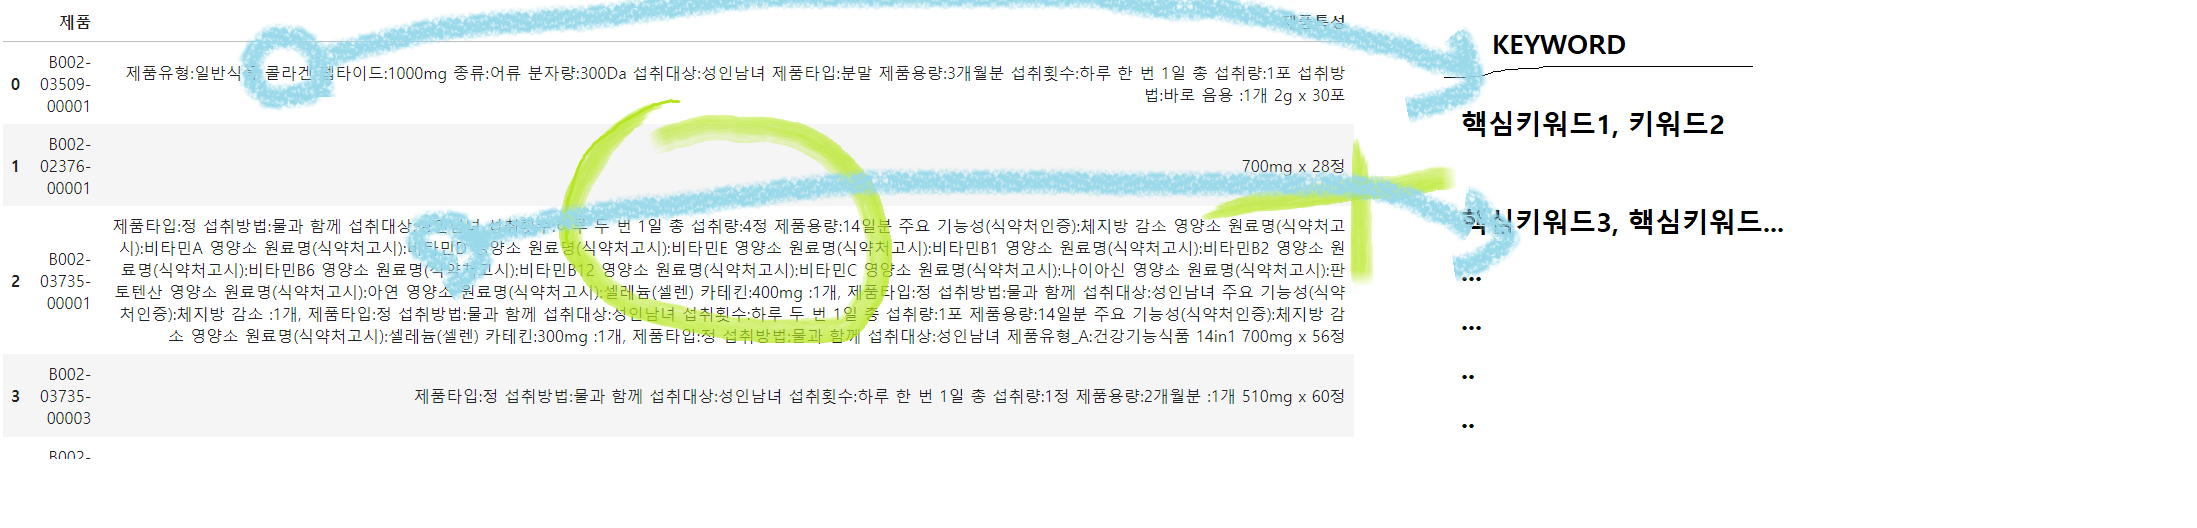

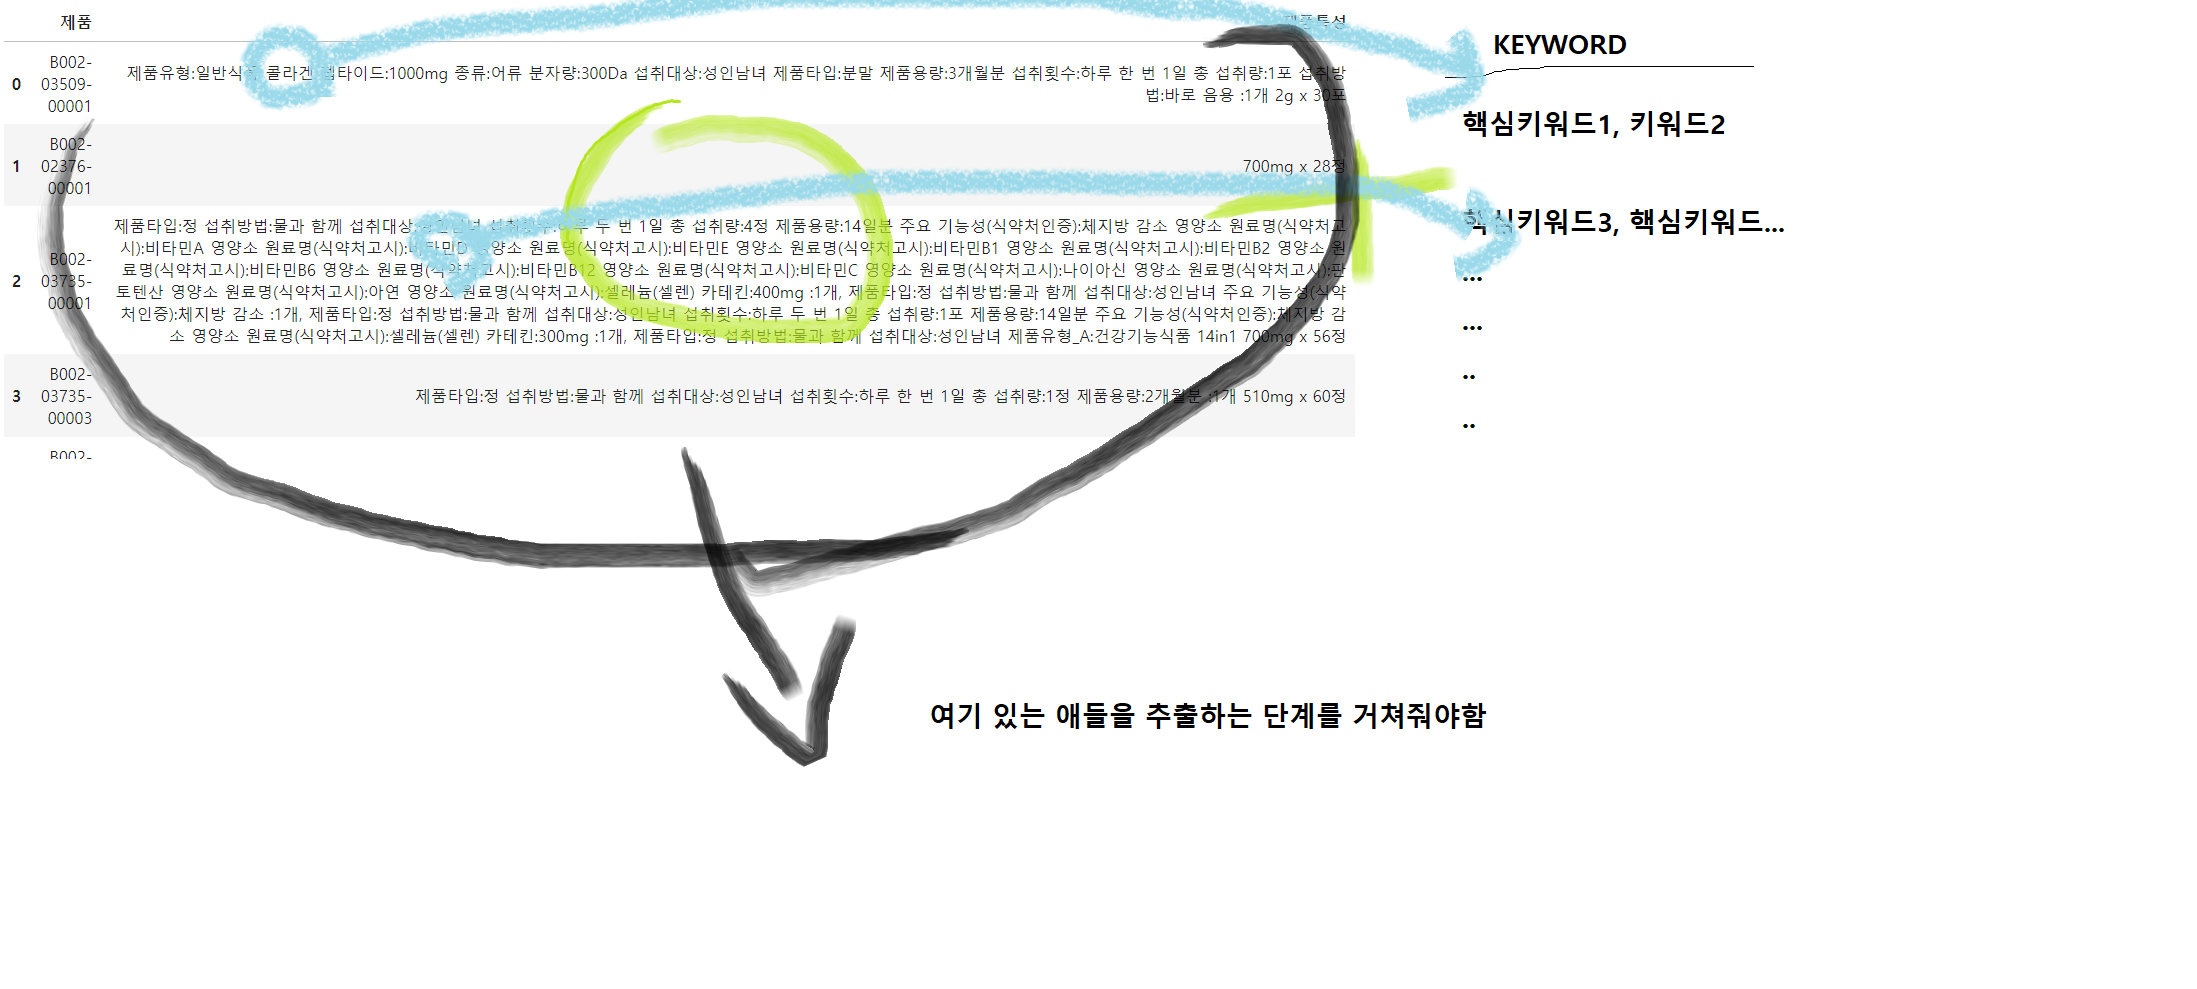

In [147]:
# 새로운 컬럼 C 생성
def extract_words(sentence):
    words = sentence.split()  # 문장을 단어로 분리
    extracted_words = [word for word in words if word in A]  # 리스트 A에 있는 단어만 추출
    return extracted_words if extracted_words else None

B['KEYWORD2'] = B['제품특성'].apply(extract_words)

print(B)

                     제품  \
0      B002-03509-00001   
1      B002-02376-00001   
2      B002-03735-00001   
3      B002-03735-00003   
4      B002-02769-00001   
...                 ...   
12773  B002-01994-00001   
12774  B002-02600-00002   
12775  B002-02372-00095   
12776  B002-01318-00002   
12777  B002-02473-00064   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [148]:
B

,제품,제품특성,KEYWORD,KEYWORD2
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포,None,[콜라겐]
1,B002-02376-00001,700mg x 28정,None,None
2,B002-03735-00001,"제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:400mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:1포 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:300mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품 14in1 700mg x 56정",None,"[주요, 감소, 주요, 감소, 주요, 감소]"
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분 :1개 510mg x 60정,None,None
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):판토텐산 1일 총 섭취량:4정 제품용량:28일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 700mg x 112정,None,"[주요, 감소]"
...,...,...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용량:300ml :3개 500ml,None,None
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품특징:윤기부여 용량:400ml(g) :1개 400ml,None,None
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,None,None
12776,B002-01318-00002,"피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 거품 세부제품특징:각질케어 세부제품특징:쿨링감 용량:236ml(g) :1개, 용기형태:뚜껑형 용량:236.6ml(g) :1개, 주요제품특징:촉촉함(수분공급) 용기형태:뚜껑형 용량:236.6ml(g) :1개, 피부타입:모든피부용 주요제품특징:세정력 용량:236ml(g) :1개, 피부타입:모든피부용 주요제품특징:세정력 용량:236ml(g) :1개 236ml",None,[거품]


In [149]:
B.drop('KEYWORD', axis=1)

,제품,제품특성,KEYWORD2
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포,[콜라겐]
1,B002-02376-00001,700mg x 28정,None
2,B002-03735-00001,"제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:400mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:1포 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:300mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품 14in1 700mg x 56정","[주요, 감소, 주요, 감소, 주요, 감소]"
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분 :1개 510mg x 60정,None
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):판토텐산 1일 총 섭취량:4정 제품용량:28일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 700mg x 112정,"[주요, 감소]"
...,...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용량:300ml :3개 500ml,None
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품특징:윤기부여 용량:400ml(g) :1개 400ml,None
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,None
12776,B002-01318-00002,"피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 거품 세부제품특징:각질케어 세부제품특징:쿨링감 용량:236ml(g) :1개, 용기형태:뚜껑형 용량:236.6ml(g) :1개, 주요제품특징:촉촉함(수분공급) 용기형태:뚜껑형 용량:236.6ml(g) :1개, 피부타입:모든피부용 주요제품특징:세정력 용량:236ml(g) :1개, 피부타입:모든피부용 주요제품특징:세정력 용량:236ml(g) :1개 236ml",[거품]


In [150]:
B.head(30)

,제품,제품특성,KEYWORD,KEYWORD2
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포,None,[콜라겐]
1,B002-02376-00001,700mg x 28정,None,None
2,B002-03735-00001,"제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:400mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:1포 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:300mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품 14in1 700mg x 56정",None,"[주요, 감소, 주요, 감소, 주요, 감소]"
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분 :1개 510mg x 60정,None,None
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):판토텐산 1일 총 섭취량:4정 제품용량:28일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 700mg x 112정,None,"[주요, 감소]"
5,B002-02769-00002,"제품유형:일반식품 섭취대상:성인남녀 제품타입:액상 제품용량:7일분 섭취횟수:하루 한 번 1일 총 섭취량:1개 섭취방법:바로 음용 :1개, 주요 기능성(식약처인증):해당 없음 영양소 원료명(식약처고시):해당 없음 종류:어류 분자량:500Da 제품타입:정 제품용량:1개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:씹어서 :1개, 제품유형:일반식품 섭취대상:성인남녀 제품타입:분말 제품용량:1개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:물과 함께 25ml x 7병",None,[주요]
6,B002-03432-00001,섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:2포 제품용량:15일분 주요 기능성(식약처인증):체지방 감소 카테킨:300mg :1개 3g x 30포,None,"[주요, 감소]"
7,B002-01075-00001,"제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):정, 생균1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주요 기능성(식약처인증):1억 CFU, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)카테킨:정, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)카테킨:정, 생균1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주요 기능성(식약처인증):1억 CFU, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)제품유형:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 식품품질인증제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:GMP우수건강기능식품제조기준, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입:분말 섭취방법:물에 섞어서 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1포 제품용량:50일분 :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:캡슐, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정 900mg x 30정",None,"[주요, 감소]"
8,B002-02925-00001,제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):해당 없음 푸닉산+후코잔틴:177mg :1개 600mg x 30캡슐,None,"[주요, 감소]"
9,B002-00771-00001,"HCA:800mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 1일 총 섭취량:1포 제품용량:1개월분 제품타입:분말 섭취횟수:하루 한 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(

In [151]:
B.tail(30)

,제품,제품특성,KEYWORD,KEYWORD2
12748,B002-01589-00064,제품타입사이즈:날개형 16개,None,None
12749,B002-02470-00004,용량:120ml(g) :본품 120g,None,None
12750,B002-03417-00119,사이즈:오버나이트 8개,None,None
12751,B002-01153-00016,사용부위:페이스용 피부타입:모든피부용 종류:쉐이빙크림 주요제품특징:저자극 용량:225ml(g) :1개 225g,None,None
12752,B002-01147-00001,"사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:저자극 주요제품특징:부드러운 발림 세부제품특징:흡수력 세부제품특징:피부진정 용기형태:뚜껑형 제품형태:크림형 용량:50ml(g) :1개, 사용부위:페이스용 사용부위:넥 피부타입:모든피부용 사용시간:낮 사용시간:밤 주요제품특징:촉촉함(수분공급) 주요제품특징:저자극 주요제품특징:부드러운 발림 세부제품특징:흡수력 세부제품특징:피부탄력 세부제품특징:영양공급 세부제품특징:피부진정 세부제품특징:피부보호 용기형태:뚜껑형 제품형태:크림형 용량:150ml(g) :1개, 포장형태:튜브형 특징:피부진정 특징:수분공급 특징:영양공급 무첨가:무색소 무첨가:무파라벤 무첨가:오일프리 무첨가:저자극 용량:160ml :1개, 포장형태:튜브형 특징:수분공급 특징:영양공급 특징:피부장벽강화 무첨가:저자극 용량:150ml :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:부드러운 발림 세부제품특징:흡수력 용기형태:튜브형 제품형태:크림형 용량:100ml(g) :1개, 피부타입:모든피부용 향계열:기타향 주요제품특징:촉촉함(수분공급) 주요제품특징:부드러운 발림 세부제품특징:저자극 세부제품특징:피부탄력 세부제품특징:영양공급 세부제품특징:흡수력 용기형태:튜브형 용량:50ml(g) :1개, 사용부위:페이스용 사용부위:바디용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 용량:50ml(g) :1개, 사용부위사용부위사용시간사용시간주요제품특징주요제품특징세부제품특징세부제품특징세부제품특징세부제품특징세부제품특징:페이스용, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:부드러운 발림 세부제품특징:화이트닝 세부제품특징:영양공급 세부제품특징:주름케어 용기형태:튜브형 제품형태:크림형 용량:50ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:저자극 세부제품특징:흡수력 세부제품특징:피부진정 용기형태:튜브형 제품형태:크림형 용량:30ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:저자극 주요제품특징:부드러운 발림 세부제품특징:흡수력 세부제품특징:윤기부여 용기형태:뚜껑형 제품형태:크림형 용량:50ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:저자극 주요제품특징:부드러운 발림 세부제품특징:흡수력 세부제품특징:피부진정 용기형태:튜브형 제품형태:크림형 용량:55ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 사용시간:낮 사용시간:밤 주요제품특징:촉촉함(수분공급) 세부제품특징:모공케어 용량:50ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:부드러운 발림 세부제품특징:흡수력 세부제품특징:화이트닝 세부제품특징:주름케어 용기형태:뚜껑형 용량:50ml(g) :1개, 연령연령연령연령연령포장형태특징특징특징타켓연령:1세, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:부드러운 발림 세부제품특징:유수분밸런스조절 세부제품특징:윤기부여 세부제품특징:화이트닝 세부제품특징:영양공급 세부제품특징:주름케어 용량:70ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 사용시간:낮 사용시간:밤 주요제품특징:촉촉함(수분공급) 주요제품특징:부드러운 발림 세부제품특징:유수분밸런스조절 세부제품특징:흡수력 세부제품특징:피부진정 용기형태:뚜껑형 제품형태:크림형 용량:50ml(g) :1개, 사용부위사용시간사용시간주요제품특징주요제품특징주요제품특징세부제품특징세부제품특징세부제품특징세부제품특징제품형태:페이스용, 사용부위피부타입사용시간사용시간주요제품특징주요제품특징주요제품특징세부제품특징세부제품특징세부제품특징용기형태제품형태용량:페이스용, 포장형태:용기형 특징:피부진정 특징:수분공급 특징:피부장벽강화 무첨가:저자극 용량:180ml :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:부드러운 발림 세부제품특징:흡수력 세부제품특징:화이트닝 세부제품특징:영양공급 세부제품특징:피부진정 용기형태:튜브형 제품형태:크림형 용량:250ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:저자극 세부제품특징:흡수력 세부제품특징:피부탄력 세부제품특징:영양공급 세부제품특징:피부진정 세부제품특징:안티에이징 용기형태:튜브형 용량:100ml(g) :1개, 피부타입주요제품특징주요제품특징주요제품특징세부제품특징용기형태용량:모든피부용, 사용부위:페이스용 피부타입:지성 사용시간:낮 사용시간:밤 주요제품특징:촉촉함(수분공급) 주요제품특징:저자극 세부제품특징:유수분밸런스조절 세부제품특징:흡수력 세부제품특징:영양공급 용기형태:튜브형 제품형태:젤형 용량:50ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 세부제품특징:피부탄력 세부제품특징:화이트닝 세부제품특징:주름케어 용기형태:튜브형 제품형태:크림형 용량:50ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:저자극 세부제품특징:피부진정 용량:50ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:부드러운 발림 세부제품특징:흡수력 세부제품특징:영양공급 용기형태:뚜껑형 용량:50ml(g) :1개, 사용부위:페이스용 피부타입:모든피부용 사용시간:낮 사용시간:밤 주요제품특징:촉촉함(수분공급) 주요제품특징:저자극 주요제품특징:부드러운 발림 세부제품특징:흡수력 세부제품특징:영양공급 세부제품특징:피부진정 제품형태:크림형 용량:50ml(g) :1개 160ml",None,"[발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림]"
12753,B002-01865-00005,"연령연령연령연령연령연령연령세트수량타켓연령특징특징특징특징특징무첨가무첨가무첨가무첨가무첨가무첨가무첨가무첨가무첨가:1세, 연령연령연령연령연령연령제품종류포장형태특징특징특징특징무첨가무첨가무첨가무첨가타켓연령:1세, 제품종류:유아바디&샴푸 포장형태:펌프형 특징:피부진정 특징:수분공급 무첨가:무색소 무첨가:무인공향료 무첨가:저자극 용량:300g :1개, 연령연령연령연령연령연령제품종류포장형태특징특징특징무첨가무첨가무첨가무첨가:1세, 세트수량:2종세트 특징:수분공급 특징:피부유연 무첨가:무색소 무첨가:무인공향료 무첨가:저자극 무첨가:무향, 제품종류:유아바디&샴푸 포장형태:펌프형 특징:수분공급 특징:피부유연 무첨가:무색소 무첨가:무인공향료 무첨가:저자극 무첨가:무설페이트 무첨가:무향 용량:300ml :1개, 제품종류:유아바디&샴푸 포장형태:펌프형 특징:피부진정 특징:수분공급 특징:영양공급 특징:피부장벽강화 무첨가:무색소 무첨가:무파라벤 무첨가:무인공향료 무첨가:저자극 용량:300ml :1개, 제품종류:유아바디&샴푸 포장형태:펌프형 특징:피부진정 특징:수분공급 용량:300ml(g) :1개, 연령연령연령연령연령연령연령제품종류포장형태특징특징특징특징특징무첨가무첨가무첨가무첨가무첨가무첨가무첨가용량타켓연령:1세, 연령연령연령연령연령연령연령제품종류포장형태특징타켓연령:1세, 제품종류:유아바디&샴푸 포장형태:펌프형 특징:피부진정 특징:수분공급 특징:피부장벽강화 특징:피부보호 무첨가:저자극 특징:약산성 :1개, 연령연령연령연령연령연령연령제품종류포장형태특징특징특징특징특징타켓연령:1세, 제품종류:유아바디&샴푸 포장형태:펌프형 특징:피부진정 특징:수분공급 특징:피

In [152]:
B.head()

,제품,제품특성,KEYWORD,KEYWORD2
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포,None,[콜라겐]
1,B002-02376-00001,700mg x 28정,None,None
2,B002-03735-00001,"제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:400mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:1포 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:300mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품 14in1 700mg x 56정",None,"[주요, 감소, 주요, 감소, 주요, 감소]"
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분 :1개 510mg x 60정,None,None
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):판토텐산 1일 총 섭취량:4정 제품용량:28일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 700mg x 112정,None,"[주요, 감소]"


In [154]:
B.columns

Index(['제품', '제품특성', 'KEYWORD', 'KEYWORD2'], dtype='object')

In [155]:
Keyword추출 = B.copy()

In [160]:
Keyword추출.drop(columns=['제품특성','KEYWORD'], inplace=True)

In [161]:
Keyword추출.to_csv('keyword.csv')

In [162]:
Keyword추출.head()

,제품,KEYWORD2
0,B002-03509-00001,[콜라겐]
1,B002-02376-00001,None
2,B002-03735-00001,"[주요, 감소, 주요, 감소, 주요, 감소]"
3,B002-03735-00003,None
4,B002-02769-00001,"[주요, 감소]"


In [163]:
Keyword추출.tail(30)

,제품,KEYWORD2
12748,B002-01589-00064,None
12749,B002-02470-00004,None
12750,B002-03417-00119,None
12751,B002-01153-00016,None
12752,B002-01147-00001,"[발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림, 발림]"
12753,B002-01865-00005,None
12754,B002-03124-00003,"[발림, 발림, 발림, 발림]"
12755,B002-00945-00020,[발림]
12756,B002-02969-00040,None
12757,B002-00207-00001,"[밴드, 밴드]"


In [65]:
import re

# 정규 표현식 패턴 정의
pattern = re.compile(r'\b(\d+[억회일분만시간초년]|1[억회일분만시간초년]|만)\b|[^a-zA-Z]')

# 딕셔너리의 키들 중 숫자와 관련된 문자열, 영어를 제외한 문자열을 제외한 키들을 새로운 리스트에 저장
non_numeric_non_english_keys = [key for key in keys if not pattern.match(key)]

print(non_numeric_non_english_keys)

['mg', 'da', 'in', 'hca', 'ml', 'cfu', 'gmp', 'isp', 'wpc', 'kcal', 'bcaa', 'haccp', 'msm', 'wpi', 'wph', 'dha', 'epa', 'rtg', 'gx', 'kg', 'impact', 'whey', 'protein', 'mpc', 'cm', 'led', 'pwm', 'rpm', 'cfm', 'db', 'aura', 'sync', 'mystic', 'light', 'rgb', 'fusion', 'polychrome', 'iu', 'te', 'gre', 'adha', 'ui', 'akba', 'kba', 'kf', 'ad', 'mcg', 'lcd', 'cell', 'amsm', 'mbp', 'cmit', 'mit', 'mm', 'al', 'mlx', 'phmg', 'as', 'em', 'pa', 'gsm', 'iso', 'set', 'brush', 'aaa', 'usb', 'ipx', 'ea', 'abs', 'pp', 'uv', 'pc', 'cc', 'mw', 'lp', 'base', 'del', 'ist', 'bet', 'mmcm', 'mah', 'bldc', 'lds', 'wi', 'fi', 'aw', 'type', 'rf', 'ghz', 'rfid', 'hx', 'oz', 'cgmp', 'diy', 'tv', 'tp', 'up', 'aa', 'siri', 'aac', 'sbc', 'os', 'ios', 'sns', 'ip', 'se', 'bar', 'km', 'kr', 'ipl', 'sp', 'cool', 'blac', 'hot', 'dc', 'spf', 'ex', 'cmos', 'af', 'ai', 'hdr', 'bionz', 'wifi', 'uhd', 'log', 'oled', 'sd', 'sdhc', 'sdxc', 'uhs', 'ii', 'aps', 'hlg', 'is', 'mp', 'hdmi', 'microusb', 'produo', 'prohgduo', 'microsd

## 이 아래는 시간 남으면 더 나아가기 

In [30]:
info.head(100)

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,"제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:400mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:1포 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:300mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품 14in1 700mg x 56정"
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분 :1개 510mg x 60정
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):판토텐산 1일 총 섭취량:4정 제품용량:28일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 700mg x 112정
...,...,...
95,B002-01739-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:2정 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 카테킨:350mg 60정
96,B002-01739-00002,"제품유형:일반식품 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:구미/젤리 제품용량:15일분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:씹어서 :1개, 제품유형:일반식품 종류:어류 분자량:500Da 섭취대상:성인남녀 제품타입:액상 제품용량:5일분 섭취횟수:하루 한 번 1일 총 섭취량:1개 섭취방법:바로 음용 :1개 25g x 15포"
97,B002-01848-00001,"1일 총 섭취량:9정 제품용량:1개월분 제품타입:정 섭취횟수:하루 세 번 섭취방법:물과 함께 섭취대상:성인남녀 :1개, HCA:1000mg 1일 총 섭취량:8정 제품용량:1개월분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 3900mg비포밀 600mg x 270정"
98,B002-01848-00002,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:6정 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 카테킨:500mg :1개 500mg 애프터밀 500mg x 180정


한 컬럼 안에 제품유형 , 종류, 섭취대상, 제품타입, 제품용량, 섭취량, 섭취방법, 음용 이렇게 써있네...
하...이걸 나눠야 겠구나.. 

그런데 제품타입, 섭취대상, 기능성 - 기능성이 없는 애들도 있음.. 

'체지방 감소'라는 기능성이 있을 때 판매량이 더 높을까?  
-어떤 기능인지 설명도 없는 애들이 있음 

'제품타입', '섭취대상' , '기능성유무' 이정도로만 축약하기 


### 1. 제품타입 

In [ ]:
제품타입:XXXX 띄어쓰기로 구분 


In [ ]:
product_info = 
# 제품 정보를 공백을 기준으로 분할
info_parts = product_info.split()

# "제품유형"을 찾기 위해 반복문을 사용
product_type = None
for part in info_parts:
    if part.startswith("제품유형:"):
        product_type = part.split(":")[1]  # 콜론(:)을 기준으로 분할하여 제품 유형 추출
        break

print("제품유형:", product_type)